In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### **Загрузка датасета**

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')

### **1. Вывести: кол-во наблюдений в датасете**

In [6]:
len(df)

4622

### **2. Вывести названия столбцов**

In [12]:
print(*df.columns, sep=', ')

order_id, quantity, item_name, choice_description, item_price


### **3. Определить самую частую позицию (item) в заказе**

In [100]:
print(*df['item_name'].mode())

Chicken Bowl


### **4. Построить гистрограмму частоты заказов по позициям (item)**

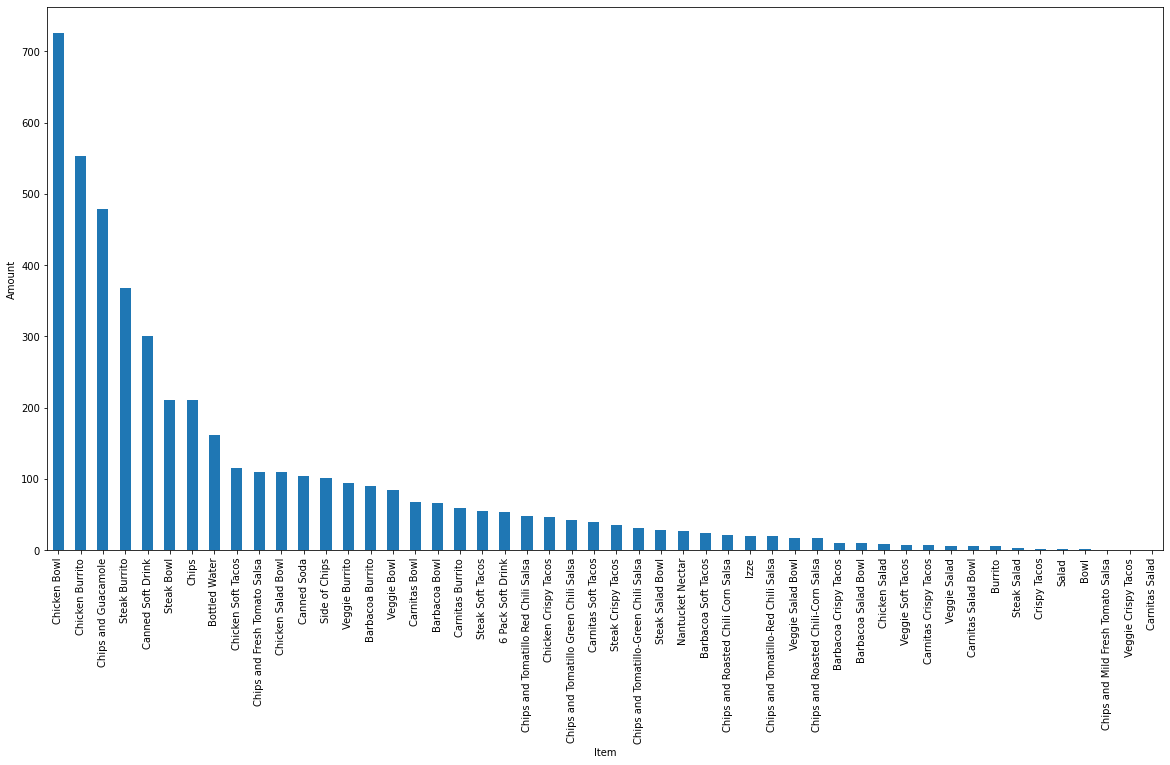

In [101]:
plt.figure(figsize=(20, 10))
df['item_name'].value_counts().plot(kind='bar')
plt.gca().update(dict(xlabel='Item', ylabel='Amount'))
plt.show()

### **5. Измените тип переменной item_price c с помощью лямбды функции**

In [37]:
df['item_price'] = df['item_price'].apply(lambda x: float(x[1:]))

In [41]:
df['item_price'].dtype

dtype('float64')

### **6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)**

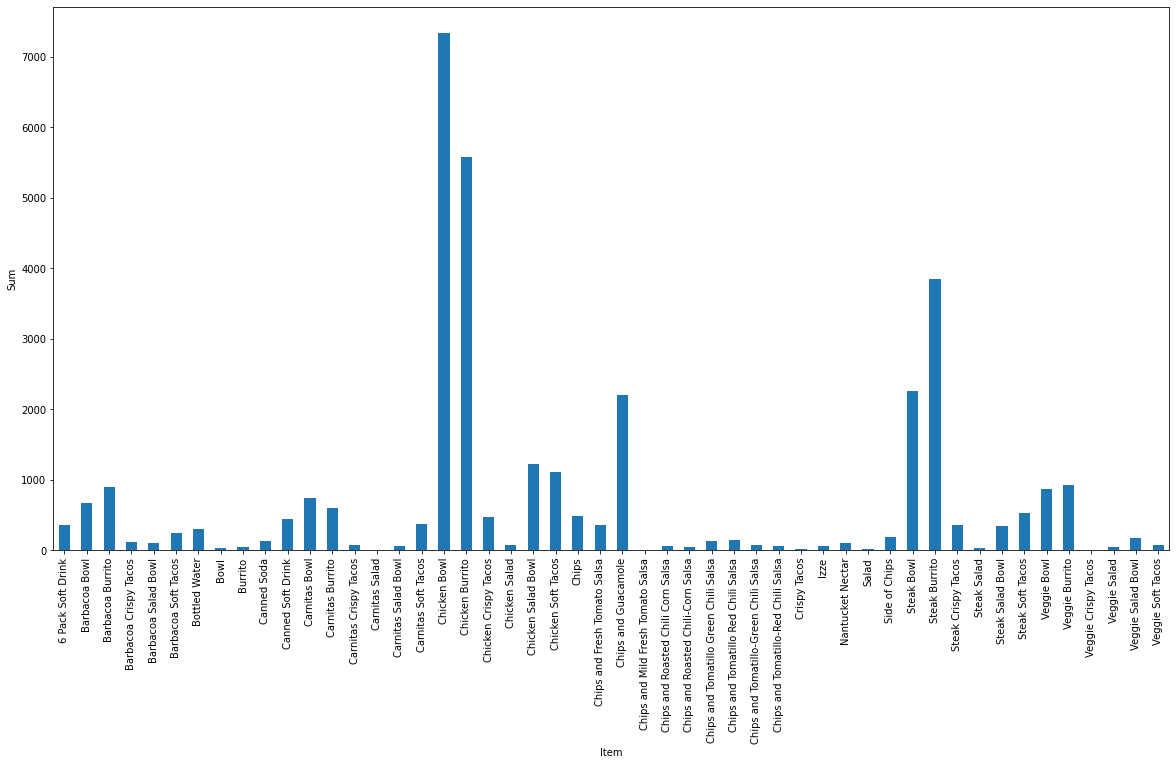

In [56]:
cost = df.groupby(['item_name']).sum()
plt.figure(figsize=(20, 10))
cost['item_price'].plot(kind='bar')
plt.gca().update(dict(xlabel='Item', ylabel='Sum'))
plt.show()

### **7. Средняя сумма заказа? (минимум 2 способа)**

In [57]:
round(df.groupby(['order_id']).item_price.sum().mean(), 2)

18.81

In [102]:
round(df['item_price'].sum()/len(df['order_id'].value_counts()), 2)

18.81

### **8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе**

In [73]:
df.groupby('order_id').item_name.nunique().agg(['mean', 'min', 'max', 'median'])

mean  2.34


### **9. Определить статистику заказов стейков, а также статистику заказов прожарки**

In [103]:
#steaks
df[df['item_name'].str.contains("Steak")].drop(['order_id'], axis=1).describe()

,quantity,item_price
count,702.000000,702.000000
mean,1.045584,10.518889
std,0.228314,2.566743
min,1.000000,8.690000
25%,1.000000,8.990000
50%,1.000000,9.250000
75%,1.000000,11.750000
max,3.000000,27.750000


In [105]:
#roasting
df[df['choice_description'].str.contains("Hot|Medium|Mild", na=False)].drop(['order_id'], axis=1).describe()

,quantity,item_price
count,783.000000,783.000000
mean,1.054917,9.772031
std,0.238920,2.588239
min,1.000000,8.190000
25%,1.000000,8.490000
50%,1.000000,8.990000
75%,1.000000,10.980000
max,3.000000,32.940000


### **10. Добавить новый столбец цен на каждую позицию в заказе в рублях.**

In [107]:
df['item_rub_price'] = round(df['item_price'] * 71.61, 2)
df

,order_id,quantity,item_name,choice_description,item_price,item_rub_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,171.15
1,1,1,Izze,[Clementine],3.39,242.76
2,1,1,Nantucket Nectar,[Apple],3.39,242.76
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,171.15
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,1215.94
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,841.42
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,841.42
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,805.61
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,626.59


### **11. Сгруппировать заказы по входящим позициям в него. Отдельно сгруппировать по стейкам во всех видах прожарках.**

In [110]:
df.groupby('order_id').agg({'item_name': lambda df: ", ".join(df), 
                            'item_price': np.sum,
                            'quantity': np.sum})

,item_name,item_price,quantity
order_id,,,
1,"Chips and Fresh Tomato Salsa, Izze, Nantucket ...",11.56,4
2,Chicken Bowl,16.98,2
3,"Chicken Bowl, Side of Chips",12.67,2
4,"Steak Burrito, Steak Soft Tacos",21.00,2
5,"Steak Burrito, Chips and Guacamole",13.70,2
...,...,...,...
1830,"Steak Burrito, Veggie Burrito",23.00,2
1831,"Carnitas Bowl, Chips, Bottled Water",12.90,3
1832,"Chicken Soft Tacos, Chips and Guacamole",13.20,2


### **12. Определить цену по каждой позиции в отдельности**

### Алгоритмы уменьшения размерности 

#### повторить эксперименты в главе 5.1 Qalitative Comparison of Multiple Algorithms статьи статьи UMAP: Uniform Manifold
#### Approximation and Projection for Dimension Reduction (https://arxiv.org/pdf/1802.03426.pdf)

#### необходимо воспроизвести все графики данной главы, соотнести выводы из статьи с вашими результатами.